# Hypothyroidism
: deficient activity of the thyroid gland; also : a resultant bodily condition characterized by lowered metabolic rate and general loss of vigor

My interest in this dataset stems from my personal experience with my own diagnosis of Hashimoto's Thyroiditis and the process I went through to finally discover my condition. 

This dataset comes from UCI Machine Learning Repository.  It is intended as a practice set for machine learning and therefoe is descriptive rather than inferential.  Details in regards to units of measure and criteria used for assigning condition were not provided with the data set.

This is one of a handful of training data sets for evaluating various thyroid conditions.  There are sets that look at Grave's disease (hyperthyroid), secondary hypothyroid (a pituitary disorder), cancer and other forms of thyroid disfunction.  Much of the same data is used for several training sets so there are columns of data in this dataset that are irrelevant to the evaluation of primary hypothyroidism.

Assumptions must be evaluated in order to determine the criteria used for diagnosing a hypothyroid condition.

First, since this set is intended for training a machine learning paradigm it can be assumed that the column 'hypothyroid' is for reference to check the accuracy of the model predictions and values were assigned using traditional clinical methods utilizing well established reference ranges for blood levels of markers.  Some of the reference ranges reported in the literature (several links provided below) vary a bit in units used and the numbers shift quite a bit depending on which units are reported.  Therefore for my initial explorations into the data I selected the numbers reported in the web sites that most lined up and made the most sense within the values reported for each category and also relevant for the period of time (pre 1987) when this data was collected.

In clincial evalutation of Hashimoto's Thyroiditis detection typically begins with high blood levels of TSH (Thyroid Stimulating Hormone). Normal levels are now referenced in the range: 0.3-3.0 uIU/L but previous reference ranges went as low as 0.2 and as high as 8.0 uIU/L.

After out-of-range TSH levels indicate the presence a thryoid condition, high for hypothyroid and low for hyperthyroid, the thyroid hormones T3 and T4 are then evaluated.  Normal range for T3 is roughly 3 to 7 pmol/L.  Levels of T4 are often reported in 3 different formats: Total T4, Free or unbound T4, and Free T4 Index (FTI).  Total T4 is not as informative as free T4 levels in diagnosing hypothyroid and there have been shifts in the methodology used for diagnosis.  Previously FTI levels were thought to be a good marker for measuring thyroid function, but today unbound T4 levels are used as any T4 bound to globulins or converted to T3 is biologically unavailable and it is only the unboud T4 that is seen by the cells. In this dataset we are provided T4U and FTI.  
Normal range for free T4 is roughly 9 to 23 pmol/L.  There are very good arguments for implementing a tighter reference range that a number of clinics now use, but in 1987 the less conservative ranges were in use so that is what I will utilze for my initial analysis.


References for thyroid hormone blood levels and diagnosis of hypothyroidism:<br>
https://www.thyroid.org/<br>
https://thyroidpharmacist.com/articles/what-to-do-if-your-tsh-is-normal-and-you-are-anything-but/<br>
https://www.webmd.com/women/what-is-tsh-test#1<br>
http://www.autoimmunemom.com/graves-disease-thyroid/thyroid-hormone-levels-t4-t3-t2-and-t1.html<br>
https://www.mayomedicallaboratories.com/test-catalog/Clinical+and+Interpretive/9263<br>
http://thyroidlovingcare.com/rethinking-normal-ranges<br>
https://www.endocrineweb.com/conditions/thyroid/thyroid-function-tests

# Importing and Formatting data for use in Python Data Science Toolkit

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as ax
%matplotlib inline

In [2]:
ht = pd.read_csv('hypothyroid data.csv', header=None)

In [3]:
#create column names
ht.columns=['hypothyroid','age','sex','on_thyroxine','query_on_thyroxine',
            'on_antithyroid_medication','thyroid_surgery','query_hypothyroid',
            'query_hyperthryoid','pregnant','sick','tumor','lithium','goiter',
            'TSH_measured','TSH','T3_measured','T3','TT4_measured','TT4',
            'T4U_measured','T4U','FTI_measured','FTI','TBG_measured','TBG']

Handling missing data: I made various attempts at this.  

I first tried replaceing '?' with 'NaN' - but had trouble with a few of my later methods producing errors in comparing strings to numbers.  

I then tried replacing the '?' with None and at first I thought it had worked as almost all of my errors disappeared - until I ran into one column that seemed to skip the first 24 rows of replacement.  I discovered that replacing values using None actually fills in the missing value with whatever value was in the cell above it.  So instead of empty cells I was creating false data that could skew the results.  I was fortunate that one of my columns began with a series of 24 '?'s or I would not have discovered my error.

My mentor had suggested simply replacing the empty values with zeroes.  In the end this was the best solution as none of the categories would ever actually measure a zero value so every zero created represented an empty value and not actual data, so when I need to I can simply exclude the zeroes in my calculations and they display on my scatter plots but are out of the way of the actual data so you can visually see where the missing data falls as well as the actual data being evaluated.

In [4]:
#Replace '?' values with 0
ht = ht.replace(['?'], 0)

In [5]:
#convert numbers to ints and floats for accurate scatter and bar plots.
for index, age in enumerate(ht['age']):
    if age != 'NaN':
        ht['age'][index] = int(age)
for index, T3 in enumerate(ht['T3']):
    if T3 != 'NaN':
        ht['T3'][index] = float(T3)
for index, TSH in enumerate(ht['TSH']):
    if TSH != 'NaN':
        ht['TSH'][index] = float(TSH)
for index, TT4 in enumerate(ht['TT4']):
    if TT4 != 'NaN':
        ht['TT4'][index] = float(TT4)
for index, T4U in enumerate(ht['T4U']):
    if T4U != 'NaN':
        ht['T4U'][index] = float(T4U)
for index, FTI in enumerate(ht['FTI']):
    if FTI != 'NaN':
        ht['FTI'][index] = float(FTI)
for index, TBG in enumerate(ht['TBG']):
    if TBG != 'NaN':
        ht['TBG'][index] = float(TBG)

In [6]:
#Change figure size
plt.rcParams["figure.figsize"] = [12,4]

# Distribution of Data

My attempts at a true histogram failed. The operation would get stuck or hung up and I could not figure out why.  So my next best solution was to force a kind of histogram by creating a bar graph with each unique value of the category (all the ages represented in the study) on the x-axis and a count of that value as it's height.

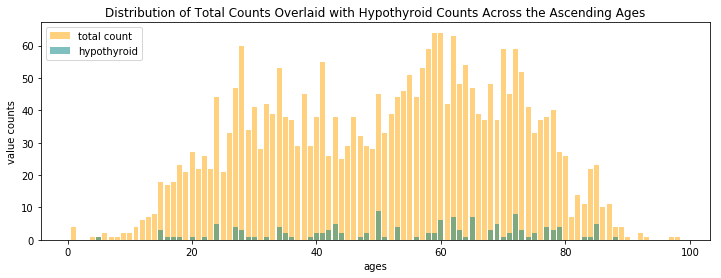

In [7]:
plt.bar(x=np.unique(ht['age'].loc[(ht['age']!=0)]),
        height=ht['age'].loc[(ht['age']!=0)].value_counts(sort=False),
        color='orange', alpha=.5, label='total count')
plt.bar(x=np.unique(ht['age'].loc[(ht['age']!=0)
                    &ht['hypothyroid'].isin(['hypothyroid'])]),
        height=ht['age'].loc[(ht['age']!=0)
                    &ht['hypothyroid'].isin(['hypothyroid'])].value_counts(sort=False), 
        color='teal',alpha=.5, label='hypothyroid')

plt.legend(loc='upper left')
plt.xlabel('ages')
plt.ylabel('value counts')
plt.title('Distribution of Total Counts Overlaid with Hypothyroid Counts Across the Ascending Ages')

plt.show()

A quick overview shows that the distribution of data runs from roughly 10 years old to upper 90s.
It is a fairly normal distribution over the span of the age groups with smaller n at the extremes (very few young people and very few old people) and most of the data spread roughly but evenly amongst the mid-range ages.

The appearance of Hypothyroidism appears to be equally sprinkled throughout the various ages with maybe a slight right-skew towards older patients.

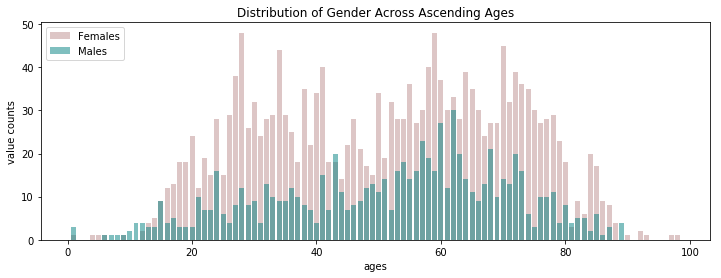

In [8]:
plt.bar(x=np.unique(ht['age'].loc[(ht['age']!=0)
                                 &(ht['sex'].isin(['F']))]),
        height=ht['age'].loc[(ht['age']!=0)
                            &(ht['sex'].isin(['F']))].value_counts(sort=False),
        color='rosybrown', alpha=.5, label='Females')
plt.bar(x=np.unique(ht['age'].loc[(ht['age']!=0)
                    &ht['sex'].isin(['M'])]),
        height=ht['age'].loc[(ht['age']!=0)
                    &ht['sex'].isin(['M'])].value_counts(sort=False), 
        color='teal',alpha=.5, label='Males')

plt.legend(loc='upper left')
plt.xlabel('ages')
plt.ylabel('value counts')
plt.title('Distribution of Gender Across Ascending Ages')

plt.show()

There are greater than 50% more females in the study than males but both groups show a roughly normal distribution across the span of ages., Males show a slight skew to the left.

#   Exploration of criteria used to determine diagnosis

TSH (pituitary hormone) vs T3, T4, and TGB hormones (thyroid hormones)

Expected:
Individuals identified as "hypothyroid" should disply high levels of TSH and low T4U (unbound T4 or free T4) or FTI (Free T4 Index).  T3 levels may be low but not always.  TBG is a secondary measure that is not always useful, but can help in diagnosis in unclear situations.  It binds free T3 and free T4 and carries it into the bloodstream.  But other hormones such as estrogen or corticosteroids can affect levels.  According to Wikipedia if TSH, T3, and T4 levels point to a thyroid condition in the absence of symptoms then TBG could be useful in the diagnosis.

From American Hypothyroid Association web page: "The free T4 and the free T4 index are both simple blood tests that measure how much unattached T4 is in the blood and available to get into cells."

#### Set up universal variables for this dataset<br>
As there are no units listed anywhere in the folders for these datasets I selected the numbers reported in the web sites above that most lined up and made the most sense within the value range for each category.  I used older range values to reflect the time period when the data was collected and evaluated.

In [9]:
lowTSH = 0.2
highTSH = 5.0
lowT4U = 0.7
highT4U = 1.9
lowFTI = 4
highFTI = 11
lowT3 = 3
highT3 = 7
lowTBG = 11
highTBG = 27

Note: x-axes converted to log scale to make values near the TSH cut-offs easier to see.

In [10]:
#Change figure size
plt.rcParams["figure.figsize"] = [12,8]

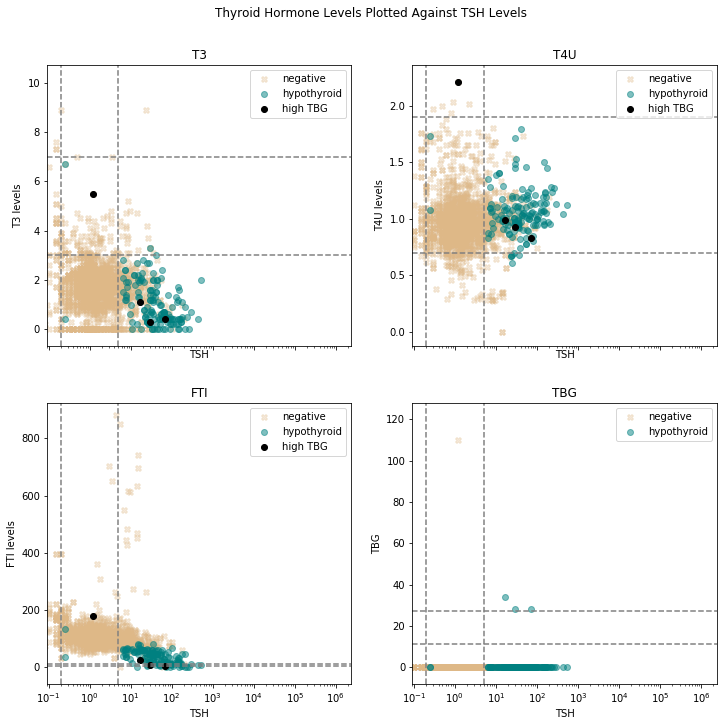

In [102]:
x, axarr = plt.subplots(2, 2, sharex=True)

axarr[0,0].scatter(ht['TSH'].loc[ht['hypothyroid'].isin(['negative'])],
                   ht['T3'].loc[ht['hypothyroid'].isin(['negative'])],
                   c='burlywood', alpha=.3, label='negative', marker='X')
axarr[0,0].scatter(ht['TSH'].loc[ht['hypothyroid'].isin(['hypothyroid'])], 
                   ht['T3'].loc[ht['hypothyroid'].isin(['hypothyroid'])],
                   c='teal', alpha=.5, label='hypothyroid')
axarr[0,0].scatter(ht['TSH'].loc[(ht['TSH']>0) & (ht['TBG']>0)], 
                   ht['T3'].loc[(ht['TSH']>0) & (ht['TBG']>0)],
                   c='black', alpha=1, label='high TBG')
axarr[0,0].axhline(y=lowT3, color='gray', linestyle='--')
axarr[0,0].axhline(y=highT3, color='gray', linestyle='--')
axarr[0,0].axvline(x=lowTSH, color='gray', linestyle='--')
axarr[0,0].axvline(x=highTSH, color='gray', linestyle='--')
axarr[0,0].set_xscale('log')
axarr[0,0].set_xlabel('TSH')
axarr[0,0].set_ylabel('T3 levels')
axarr[0,0].legend(loc='upper right',prop={'size': 10});
axarr[0,0].set_title('T3')

axarr[0,1].scatter(ht['TSH'].loc[ht['hypothyroid'].isin(['negative'])],
                   ht['T4U'].loc[ht['hypothyroid'].isin(['negative'])], 
                   c='burlywood', alpha=.3, label='negative', marker='X')
axarr[0,1].scatter(ht['TSH'].loc[ht['hypothyroid'].isin(['hypothyroid'])],
                   ht['T4U'].loc[ht['hypothyroid'].isin(['hypothyroid'])], 
                   c='teal', alpha=.5, label='hypothyroid')
axarr[0,1].scatter(ht['TSH'].loc[(ht['TSH']>0) & (ht['TBG']>0)], 
                   ht['T4U'].loc[(ht['TSH']>0) & (ht['TBG']>0)],
                   c='black', alpha=1, label='high TBG')
axarr[0,1].axhline(y=lowT4U, color='gray', linestyle='--')
axarr[0,1].axhline(y=highT4U, color='gray', linestyle='--')
axarr[0,1].axvline(x=lowTSH, color='gray', linestyle='--')
axarr[0,1].axvline(x=highTSH, color='gray', linestyle='--')
axarr[0,1].set_xscale('log')
axarr[0,1].set_xlabel('TSH')
axarr[0,1].set_ylabel('T4U levels')
axarr[0,1].legend(loc='upper right',prop={'size': 10});
axarr[0,1].set_title('T4U')

axarr[1,0].scatter(ht['TSH'].loc[ht['hypothyroid'].isin(['negative'])],
                   ht['FTI'].loc[ht['hypothyroid'].isin(['negative'])],
                   c='burlywood', alpha=.3, label='negative', marker='X')
axarr[1,0].scatter(ht['TSH'].loc[ht['hypothyroid'].isin(['hypothyroid'])],
                   ht['FTI'].loc[ht['hypothyroid'].isin(['hypothyroid'])],
                   c='teal', alpha=.5, label='hypothyroid')
axarr[1,0].scatter(ht['TSH'].loc[(ht['TSH']>0) & (ht['TBG']>0)], 
                   ht['FTI'].loc[(ht['TSH']>0) & (ht['TBG']>0)],
                   c='black', alpha=1, label='high TBG')
axarr[1,0].axhline(y=lowFTI, color='gray', linestyle='--')
axarr[1,0].axhline(y=highFTI, color='gray', linestyle='--')
axarr[1,0].axvline(x=lowTSH, color='gray', linestyle='--')
axarr[1,0].axvline(x=highTSH, color='gray', linestyle='--')
axarr[1,0].set_xscale('log')
axarr[1,0].set_xlabel('TSH')
axarr[1,0].set_ylabel('FTI levels')
axarr[1,0].legend(loc='upper right',prop={'size': 10});
axarr[1,0].set_title('FTI')

axarr[1,1].scatter(ht['TSH'].loc[ht['hypothyroid'].isin(['negative'])],
                   ht['TBG'].loc[ht['hypothyroid'].isin(['negative'])],
                   c='burlywood', alpha=.3, label='negative', marker='X')
axarr[1,1].scatter(ht['TSH'].loc[ht['hypothyroid'].isin(['hypothyroid'])],
                   ht['TBG'].loc[ht['hypothyroid'].isin(['hypothyroid'])],
                   c='teal', alpha=.5, label='hypothyroid')
axarr[1,1].axhline(y=lowTBG, color='gray', linestyle='--')
axarr[1,1].axhline(y=highTBG, color='gray', linestyle='--')
axarr[1,1].axvline(x=lowTSH, color='gray', linestyle='--')
axarr[1,1].axvline(x=highTSH, color='gray', linestyle='--')
axarr[1,1].set_xscale('log')
axarr[1,1].set_xlabel('TSH')
axarr[1,1].set_ylabel('TBG')
axarr[1,1].legend(loc='upper right',prop={'size': 10});
axarr[1,1].set_title('TBG')

x.subplots_adjust(hspace=.2, top=1.2)
x.suptitle('Thyroid Hormone Levels Plotted Against TSH Levels', y=1.3)

plt.show()

Based on my reading and research T4U and FTI levels should be lower than the normal range in hypothyroid patients, but according to the range that I have currently chosen for the values provided in the data frame, the T4 levels are either in range or above range.  I can think of two reasons for this - one, of course, is that my ranges are incorrect; but the other is that there is another group that I have not yet taken into account - some patients are treated with thyroxine, a T4 hormonal supplement.  If these patients have been on the supplement long enough to bring levels back into range then they would appear normal though they are technically 'hypothyroid'.

Note: There are only 4 data points for TBG. I checked to see if they were pregnant women which sometimes have elevated TBG levels, but they are not.  This parameter does not seem to inform the diagnosis of hypothyroidism and will be ignored moving forward.

I will recreate the same exact graphs, but with the two groups now divided into treated and untreated categories.
Expected:<br>
Treated group is within range and intreated group is below range.

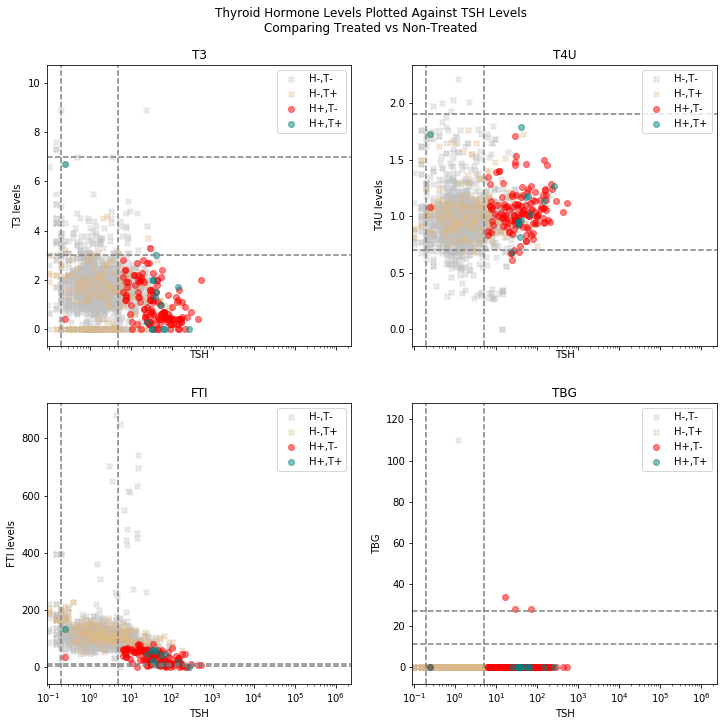

In [12]:
x, axarr = plt.subplots(2, 2, sharex=True)

label1 = 'H-,T-'
label2 = 'H-,T+'
label3 = 'H+,T-'
label4 = 'H+,T+'

axarr[0,0].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['T3'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='silver', alpha=.3, label=label1, marker='X')
axarr[0,0].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['T3'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='burlywood', alpha=.3, label=label2, marker='X')
axarr[0,0].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['T3'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='red', alpha=.5, label=label3)
axarr[0,0].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['T3'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='teal', alpha=.5, label=label4)
axarr[0,0].axhline(y=lowT3, color='gray', linestyle='--')
axarr[0,0].axhline(y=highT3, color='gray', linestyle='--')
axarr[0,0].axvline(x=lowTSH, color='gray', linestyle='--')
axarr[0,0].axvline(x=highTSH, color='gray', linestyle='--')
axarr[0,0].set_xscale('log')
axarr[0,0].set_xlabel('TSH')
axarr[0,0].set_ylabel('T3 levels')
axarr[0,0].legend(loc='upper right',prop={'size': 10});
axarr[0,0].set_title('T3')

axarr[0,1].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['T4U'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='silver', alpha=.3, label=label1, marker='X')
axarr[0,1].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['T4U'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='burlywood', alpha=.3, label=label2, marker='X')
axarr[0,1].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['T4U'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='red', alpha=.5, label=label3)
axarr[0,1].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['T4U'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='teal', alpha=.5, label=label4)
axarr[0,1].axhline(y=lowT4U, color='gray', linestyle='--')
axarr[0,1].axhline(y=highT4U, color='gray', linestyle='--')
axarr[0,1].axvline(x=lowTSH, color='gray', linestyle='--')
axarr[0,1].axvline(x=highTSH, color='gray', linestyle='--')
axarr[0,1].set_xscale('log')
axarr[0,1].set_xlabel('TSH')
axarr[0,1].set_ylabel('T4U levels')
axarr[0,1].legend(loc='upper right',prop={'size': 10});
axarr[0,1].set_title('T4U')

axarr[1,0].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['FTI'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='silver', alpha=.3, label=label1, marker='X')
axarr[1,0].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['FTI'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='burlywood', alpha=.3, label=label2, marker='X')
axarr[1,0].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['FTI'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='red', alpha=.5, label=label3)
axarr[1,0].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['FTI'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='teal', alpha=.5, label=label4)
axarr[1,0].axhline(y=lowFTI, color='gray', linestyle='--')
axarr[1,0].axhline(y=highFTI, color='gray', linestyle='--')
axarr[1,0].axvline(x=lowTSH, color='gray', linestyle='--')
axarr[1,0].axvline(x=highTSH, color='gray', linestyle='--')
axarr[1,0].set_xscale('log')
axarr[1,0].set_xlabel('TSH')
axarr[1,0].set_ylabel('FTI levels')
axarr[1,0].legend(loc='upper right',prop={'size': 10});
axarr[1,0].set_title('FTI')

axarr[1,1].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['TBG'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='silver', alpha=.3, label=label1, marker='X')
axarr[1,1].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['TBG'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='burlywood', alpha=.3, label=label2, marker='X')
axarr[1,1].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['TBG'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='red', alpha=.5, label=label3)
axarr[1,1].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['TBG'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='teal', alpha=.5, label=label4)
axarr[1,1].axhline(y=lowTBG, color='gray', linestyle='--')
axarr[1,1].axhline(y=highTBG, color='gray', linestyle='--')
axarr[1,1].axvline(x=lowTSH, color='gray', linestyle='--')
axarr[1,1].axvline(x=highTSH, color='gray', linestyle='--')
axarr[1,1].set_xscale('log')
axarr[1,1].set_xlabel('TSH')
axarr[1,1].set_ylabel('TBG')
axarr[1,1].legend(loc='upper right',prop={'size': 10});
axarr[1,1].set_title('TBG')

x.subplots_adjust(hspace=.2, top=1.2)
x.suptitle('Thyroid Hormone Levels Plotted Against TSH Levels\nComparing Treated vs Non-Treated', y=1.3)

plt.show()

Treated and Untreated data are highly mixed and there is no clear distinction between the two groups.
Looking at the data again I see there are clear clusters of hypothryoid vs normal patients.  To find a better cutoff for my ranges I will use the upper and lower quartile values calculated off of the normal data in each category.

### New Cutoffs

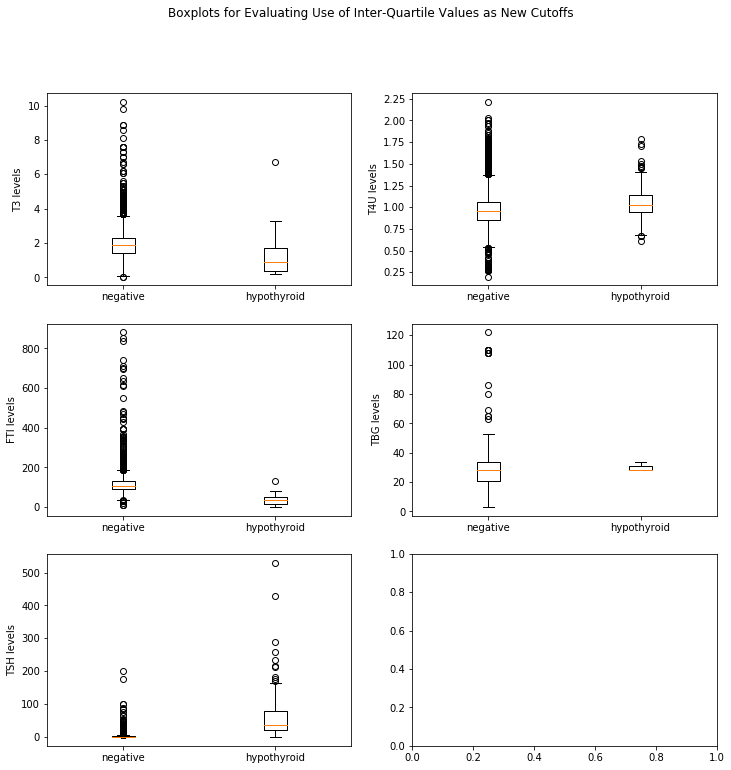

In [13]:
#Change figure size
plt.rcParams["figure.figsize"] = [12,12]

b, axarr = plt.subplots(3, 2)

ax_T3 = axarr[0,0].boxplot([ht['T3'].loc[(ht['T3']!=0)
                                &(ht['hypothyroid'].isin(['negative']))],
                    ht['T3'].loc[(ht['T3']!=0)
                                &(ht['hypothyroid'].isin(['hypothyroid']))]],
                  positions=[1,2], labels=['negative', 'hypothyroid'])
axarr[0,0].set_ylabel('T3 levels')

ax_T4U = axarr[0,1].boxplot([ht['T4U'].loc[(ht['T4U']!=0)
                                &(ht['hypothyroid'].isin(['negative']))],
                    ht['T4U'].loc[(ht['T4U']!=0)
                                &(ht['hypothyroid'].isin(['hypothyroid']))]],
                  positions = [1,2], labels = ['negative', 'hypothyroid'])
axarr[0,1].set_ylabel('T4U levels')

ax_FTI = axarr[1,0].boxplot([ht['FTI'].loc[(ht['FTI']!=0)
                                &(ht['hypothyroid'].isin(['negative']))],
                    ht['FTI'].loc[(ht['FTI']!=0)
                                &(ht['hypothyroid'].isin(['hypothyroid']))]],
                  positions = [1,2], labels = ['negative', 'hypothyroid'])
axarr[1,0].set_ylabel('FTI levels')

ax_TBG = axarr[1,1].boxplot([ht['TBG'].loc[(ht['TBG']!=0)
                                &(ht['hypothyroid'].isin(['negative']))],
                    ht['TBG'].loc[(ht['TBG']!=0)
                                &(ht['hypothyroid'].isin(['hypothyroid']))]],
                  positions = [1,2], labels = ['negative', 'hypothyroid'])
axarr[1,1].set_ylabel('TBG levels')

ax_TSH = axarr[2,0].boxplot([ht['TSH'].loc[(ht['TSH']!=0)
                                &(ht['hypothyroid'].isin(['negative']))],
                    ht['TSH'].loc[(ht['TSH']!=0)
                                &(ht['hypothyroid'].isin(['hypothyroid']))]],
                  positions = [1,2], labels = ['negative', 'hypothyroid'])
axarr[2,0].set_ylabel('TSH levels')

b.suptitle('Boxplots for Evaluating Use of Inter-Quartile Values as New Cutoffs')

plt.show()

A quick visualization of the boxplots shows that for T3 and FTI, using the upper and lower quartile ranges would fit the disease profile much better.

In [14]:
#method for changing limits values to quartiles

def negative_thyroid_quartiles(column_name, quartile):
    try:
        sortedPoints = sorted(ht[column_name].loc[(ht[column_name]!=0)
                                &(ht['hypothyroid'].isin(['negative']))])
        mid = len(sortedPoints) / 2

        if (len(sortedPoints) % 2 == 0):
            # even
            if quartile == 'lower':
                return np.median(sortedPoints[:int(mid)])
            if quartile == 'upper':
                return np.median(sortedPoints[int(mid):])
        else:
           # odd
            if quartile == 'lower':
                return np.median(sortedPoints[:int(mid)])  # same as even
            if quartile == 'upper':
                return np.median(sortedPoints[int(mid+1):])
    except ValueError:
        print('There is an error in your input')

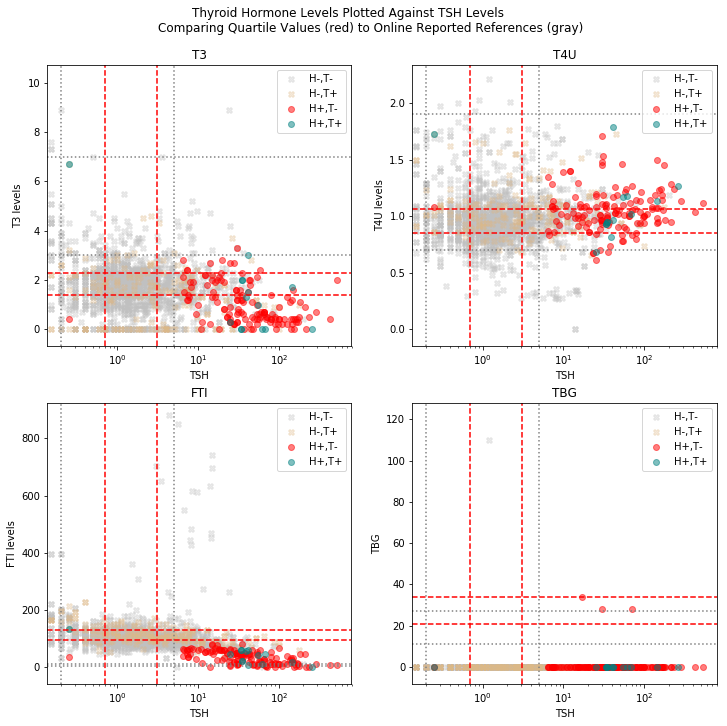

In [15]:
#Change figure size
plt.rcParams["figure.figsize"] = [12,8]

#Change limits to new limits using quartiles
lowTSH_2 = negative_thyroid_quartiles('TSH', 'lower')
highTSH_2 = negative_thyroid_quartiles('TSH', 'upper')
lowT4U_2 = negative_thyroid_quartiles('T4U', 'lower')
highT4U_2 = negative_thyroid_quartiles('T4U', 'upper')
lowFTI_2 = negative_thyroid_quartiles('FTI', 'lower')
highFTI_2 = negative_thyroid_quartiles('FTI', 'upper')
lowT3_2 = negative_thyroid_quartiles('T3', 'lower')
highT3_2 = negative_thyroid_quartiles('T3', 'upper')
lowTBG_2 = negative_thyroid_quartiles('TBG', 'lower')
highTBG_2 = negative_thyroid_quartiles('TBG', 'upper')

x, axarr = plt.subplots(2, 2)
label1 = 'H-,T-'
label2 = 'H-,T+'
label3 = 'H+,T-'
label4 = 'H+,T+'

axarr[0,0].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['T3'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='silver', alpha=.3, label=label1, marker='X')
axarr[0,0].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['T3'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='burlywood', alpha=.3, label=label2, marker='X')
axarr[0,0].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['T3'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='red', alpha=.5, label=label3)
axarr[0,0].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['T3'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='teal', alpha=.5, label=label4)
axarr[0,0].axhline(y=lowT3, color='gray', linestyle=':')
axarr[0,0].axhline(y=highT3, color='gray', linestyle=':')
axarr[0,0].axvline(x=lowTSH, color='gray', linestyle=':')
axarr[0,0].axvline(x=highTSH, color='gray', linestyle=':')
axarr[0,0].axhline(y=lowT3_2, color='red', linestyle='--')
axarr[0,0].axhline(y=highT3_2, color='red', linestyle='--')
axarr[0,0].axvline(x=lowTSH_2, color='red', linestyle='--')
axarr[0,0].axvline(x=highTSH_2, color='red', linestyle='--')
axarr[0,0].set_xscale('log')
axarr[0,0].set_xlabel('TSH')
axarr[0,0].set_ylabel('T3 levels')
axarr[0,0].legend(loc='upper right',prop={'size': 10});
axarr[0,0].set_title('T3')

axarr[0,1].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['T4U'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='silver', alpha=.3, label=label1, marker='X')
axarr[0,1].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['T4U'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='burlywood', alpha=.3, label=label2, marker='X')
axarr[0,1].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['T4U'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='red', alpha=.5, label=label3)
axarr[0,1].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['T4U'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='teal', alpha=.5, label=label4)
axarr[0,1].axhline(y=lowT4U, color='gray', linestyle=':')
axarr[0,1].axhline(y=highT4U, color='gray', linestyle=':')
axarr[0,1].axvline(x=lowTSH, color='gray', linestyle=':')
axarr[0,1].axvline(x=highTSH, color='gray', linestyle=':')
axarr[0,1].axhline(y=lowT4U_2, color='red', linestyle='--')
axarr[0,1].axhline(y=highT4U_2, color='red', linestyle='--')
axarr[0,1].axvline(x=lowTSH_2, color='red', linestyle='--')
axarr[0,1].axvline(x=highTSH_2, color='red', linestyle='--')
axarr[0,1].set_xscale('log')
axarr[0,1].set_xlabel('TSH')
axarr[0,1].set_ylabel('T4U levels')
axarr[0,1].legend(loc='upper right',prop={'size': 10});
axarr[0,1].set_title('T4U')

axarr[1,0].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['FTI'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='silver', alpha=.3, label=label1, marker='X')
axarr[1,0].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['FTI'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='burlywood', alpha=.3, label=label2, marker='X')
axarr[1,0].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['FTI'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='red', alpha=.5, label=label3)
axarr[1,0].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['FTI'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='teal', alpha=.5, label=label4)
axarr[1,0].axhline(y=lowFTI, color='gray', linestyle=':')
axarr[1,0].axhline(y=highFTI, color='gray', linestyle=':')
axarr[1,0].axvline(x=lowTSH, color='gray', linestyle=':')
axarr[1,0].axvline(x=highTSH, color='gray', linestyle=':')
axarr[1,0].axhline(y=lowFTI_2, color='red', linestyle='--')
axarr[1,0].axhline(y=highFTI_2, color='red', linestyle='--')
axarr[1,0].axvline(x=lowTSH_2, color='red', linestyle='--')
axarr[1,0].axvline(x=highTSH_2, color='red', linestyle='--')
axarr[1,0].set_xscale('log')
axarr[1,0].set_xlabel('TSH')
axarr[1,0].set_ylabel('FTI levels')
axarr[1,0].legend(loc='upper right',prop={'size': 10});
axarr[1,0].set_title('FTI')

axarr[1,1].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['TBG'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='silver', alpha=.3, label=label1, marker='X')
axarr[1,1].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['TBG'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='burlywood', alpha=.3, label=label2, marker='X')
axarr[1,1].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['TBG'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='red', alpha=.5, label=label3)
axarr[1,1].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['TBG'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='teal', alpha=.5, label=label4)
axarr[1,1].axhline(y=lowTBG, color='gray', linestyle=':')
axarr[1,1].axhline(y=highTBG, color='gray', linestyle=':')
axarr[1,1].axvline(x=lowTSH, color='gray', linestyle=':')
axarr[1,1].axvline(x=highTSH, color='gray', linestyle=':')
axarr[1,1].axhline(y=lowTBG_2, color='red', linestyle='--')
axarr[1,1].axhline(y=highTBG_2, color='red', linestyle='--')
axarr[1,1].axvline(x=lowTSH_2, color='red', linestyle='--')
axarr[1,1].axvline(x=highTSH_2, color='red', linestyle='--')
axarr[1,1].set_xscale('log')
axarr[1,1].set_xlabel('TSH')
axarr[1,1].set_ylabel('TBG')
axarr[1,1].legend(loc='upper right',prop={'size': 10});
axarr[1,1].set_title('TBG')

x.subplots_adjust(hspace=.2, top=1.2)
x.suptitle('Thyroid Hormone Levels Plotted Against TSH Levels\
            \nComparing Quartile Values (red) to Online Reported References (gray)'
           , y=1.3)

plt.show()

In [16]:
print('\tlower and upper Quartiles\tValues selected from the literature\n'
      'low TSH: ', '\t', lowTSH_2, '\t\t\t', lowTSH, '\n'
      'high TSH: ', '\t', highTSH_2, '\t\t\t', highTSH, '\n'
      'low T3: ', '\t', lowT3_2, '\t\t\t', lowT3, '\n'
      'high T3: ', '\t', highT3_2, '\t\t\t', highT3, '\n'
      'low T4U: ', '\t', lowT4U_2, '\t\t\t', lowT4U, '\n'
      'high T4U: ', '\t', highT4U_2, '\t\t\t',highT4U, '\n'
      'low FTI: ', '\t', lowFTI_2, '\t\t\t', lowFTI, '\n'
      'high FTI: ', '\t', highFTI_2, '\t\t\t', highFTI, '\n'
      'low TBG: ', '\t', lowTBG_2, '\t\t\t', lowTBG, '\n'
      'high TBG: ', '\t', highTBG_2, '\t\t\t', highTBG)

	lower and upper Quartiles	Values selected from the literature
low TSH:  	 0.7 			 0.2 
high TSH:  	 3.1 			 5.0 
low T3:  	 1.4 			 3 
high T3:  	 2.3 			 7 
low T4U:  	 0.85 			 0.7 
high T4U:  	 1.06 			 1.9 
low FTI:  	 93.0 			 4 
high FTI:  	 131.0 			 11 
low TBG:  	 21.0 			 11 
high TBG:  	 34.0 			 27


Comparing the new ranges for the TSH cutoffs it seems that quartile values are close, but maybe we can do better?  Perhaps it would perhaps be more accurate to use the high and low whisker values instead.

In [17]:
#method for extracting whisker values from boxplots
#returns in order: low and high whisker start-values for hypothyroid negative group
def whiskers(ax):
    whisk = [item.get_ydata() for item in ax['whiskers']]
    return ([whisk[0][1], whisk[1][1]])

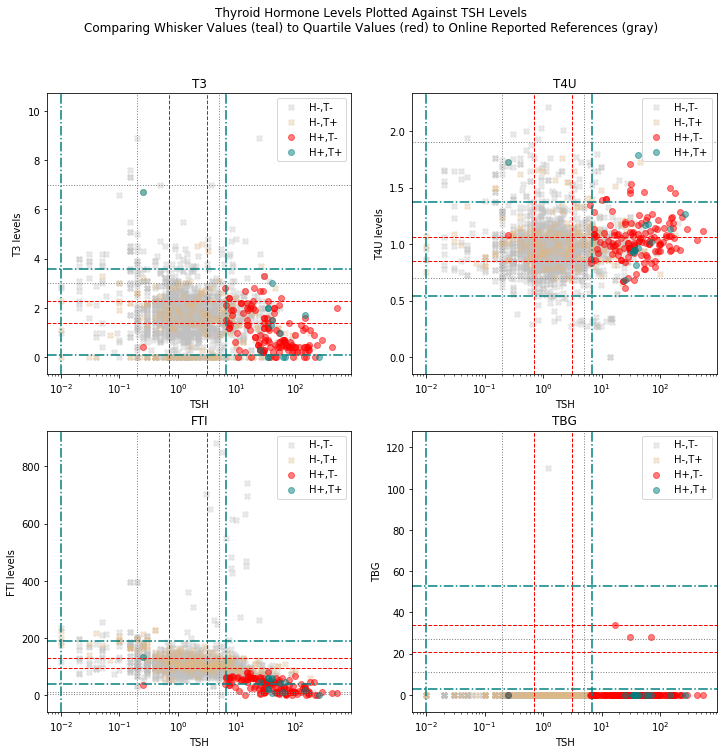

In [18]:
#Change limits to new limits using quartiles
lowTSH_3 = whiskers(ax_TSH)[0]
highTSH_3 = whiskers(ax_TSH)[1]
lowT4U_3 = whiskers(ax_T4U)[0]
highT4U_3 = whiskers(ax_T4U)[1]
lowFTI_3 = whiskers(ax_FTI)[0]
highFTI_3 = whiskers(ax_FTI)[1]
lowT3_3 = whiskers(ax_T3)[0]
highT3_3 = whiskers(ax_T3)[1]
lowTBG_3 = whiskers(ax_TBG)[0]
highTBG_3 = whiskers(ax_TBG)[1]

x, axarr = plt.subplots(2, 2)
label1 = 'H-,T-'
label2 = 'H-,T+'
label3 = 'H+,T-'
label4 = 'H+,T+'

axarr[0,0].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['T3'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='silver', alpha=.3, label=label1, marker='X')
axarr[0,0].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['T3'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='burlywood', alpha=.3, label=label2, marker='X')
axarr[0,0].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['T3'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='red', alpha=.5, label=label3)
axarr[0,0].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['T3'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='teal', alpha=.5, label=label4)
axarr[0,0].axhline(y=lowT3, color='gray', linestyle=':', lw=1)
axarr[0,0].axhline(y=highT3, color='gray', linestyle=':', lw=1)
axarr[0,0].axvline(x=lowTSH, color='gray', linestyle=':', lw=1)
axarr[0,0].axvline(x=highTSH, color='gray', linestyle=':', lw=1)
axarr[0,0].axhline(y=lowT3_2, color='red', linestyle='--', lw=1)
axarr[0,0].axhline(y=highT3_2, color='red', linestyle='--', lw=1)
axarr[0,0].axvline(x=lowTSH_2, color='red', linestyle='--', lw=1)
axarr[0,0].axvline(x=highTSH_2, color='red', linestyle='--', lw=1)
axarr[0,0].axhline(y=lowT3_3, color='teal', linestyle='-.')
axarr[0,0].axhline(y=highT3_3, color='teal', linestyle='-.')
axarr[0,0].axvline(x=lowTSH_3, color='teal', linestyle='-.')
axarr[0,0].axvline(x=highTSH_3, color='teal', linestyle='-.')
axarr[0,0].set_xscale('log')
axarr[0,0].set_xlabel('TSH')
axarr[0,0].set_ylabel('T3 levels')
axarr[0,0].legend(loc='upper right',prop={'size': 10});
axarr[0,0].set_title('T3')

axarr[0,1].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['T4U'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='silver', alpha=.3, label=label1, marker='X')
axarr[0,1].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['T4U'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='burlywood', alpha=.3, label=label2, marker='X')
axarr[0,1].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['T4U'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='red', alpha=.5, label=label3)
axarr[0,1].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['T4U'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='teal', alpha=.5, label=label4)
axarr[0,1].axhline(y=lowT4U, color='gray', linestyle=':', lw=1)
axarr[0,1].axhline(y=highT4U, color='gray', linestyle=':', lw=1)
axarr[0,1].axvline(x=lowTSH, color='gray', linestyle=':', lw=1)
axarr[0,1].axvline(x=highTSH, color='gray', linestyle=':', lw=1)
axarr[0,1].axhline(y=lowT4U_2, color='red', linestyle='--', lw=1)
axarr[0,1].axhline(y=highT4U_2, color='red', linestyle='--', lw=1)
axarr[0,1].axvline(x=lowTSH_2, color='red', linestyle='--', lw=1)
axarr[0,1].axvline(x=highTSH_2, color='red', linestyle='--', lw=1)
axarr[0,1].axhline(y=lowT4U_3, color='teal', linestyle='-.')
axarr[0,1].axhline(y=highT4U_3, color='teal', linestyle='-.')
axarr[0,1].axvline(x=lowTSH_3, color='teal', linestyle='-.')
axarr[0,1].axvline(x=highTSH_3, color='teal', linestyle='-.')
axarr[0,1].set_xscale('log')
axarr[0,1].set_xlabel('TSH')
axarr[0,1].set_ylabel('T4U levels')
axarr[0,1].legend(loc='upper right',prop={'size': 10});
axarr[0,1].set_title('T4U')

axarr[1,0].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['FTI'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='silver', alpha=.3, label=label1, marker='X')
axarr[1,0].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['FTI'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='burlywood', alpha=.3, label=label2, marker='X')
axarr[1,0].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['FTI'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='red', alpha=.5, label=label3)
axarr[1,0].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['FTI'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='teal', alpha=.5, label=label4)
axarr[1,0].axhline(y=lowFTI, color='gray', linestyle=':', lw=1)
axarr[1,0].axhline(y=highFTI, color='gray', linestyle=':', lw=1)
axarr[1,0].axvline(x=lowTSH, color='gray', linestyle=':', lw=1)
axarr[1,0].axvline(x=highTSH, color='gray', linestyle=':', lw=1)
axarr[1,0].axhline(y=lowFTI_2, color='red', linestyle='--', lw=1)
axarr[1,0].axhline(y=highFTI_2, color='red', linestyle='--', lw=1)
axarr[1,0].axvline(x=lowTSH_2, color='red', linestyle='--', lw=1)
axarr[1,0].axvline(x=highTSH_2, color='red', linestyle='--', lw=1)
axarr[1,0].axhline(y=lowFTI_3, color='teal', linestyle='-.')
axarr[1,0].axhline(y=highFTI_3, color='teal', linestyle='-.')
axarr[1,0].axvline(x=lowTSH_3, color='teal', linestyle='-.')
axarr[1,0].axvline(x=highTSH_3, color='teal', linestyle='-.')
axarr[1,0].set_xscale('log')
axarr[1,0].set_xlabel('TSH')
axarr[1,0].set_ylabel('FTI levels')
axarr[1,0].legend(loc='upper right',prop={'size': 10});
axarr[1,0].set_title('FTI')

axarr[1,1].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['TBG'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='silver', alpha=.3, label=label1, marker='X')
axarr[1,1].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['TBG'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='burlywood', alpha=.3, label=label2, marker='X')
axarr[1,1].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   ht['TBG'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['f']))],
                   c='red', alpha=.5, label=label3)
axarr[1,1].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   ht['TBG'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['on_thyroxine'].isin(['t']))],
                   c='teal', alpha=.5, label=label4)
axarr[1,1].axhline(y=lowTBG, color='gray', linestyle=':', lw=1)
axarr[1,1].axhline(y=highTBG, color='gray', linestyle=':', lw=1)
axarr[1,1].axvline(x=lowTSH, color='gray', linestyle=':', lw=1)
axarr[1,1].axvline(x=highTSH, color='gray', linestyle=':', lw=1)
axarr[1,1].axhline(y=lowTBG_2, color='red', linestyle='--', lw=1)
axarr[1,1].axhline(y=highTBG_2, color='red', linestyle='--', lw=1)
axarr[1,1].axvline(x=lowTSH_2, color='red', linestyle='--', lw=1)
axarr[1,1].axvline(x=highTSH_2, color='red', linestyle='--', lw=1)
axarr[1,1].axhline(y=lowTBG_3, color='teal', linestyle='-.')
axarr[1,1].axhline(y=highTBG_3, color='teal', linestyle='-.')
axarr[1,1].axvline(x=lowTSH_3, color='teal', linestyle='-.')
axarr[1,1].axvline(x=highTSH_3, color='teal', linestyle='-.')
axarr[1,1].set_xscale('log')
axarr[1,1].set_xlabel('TSH')
axarr[1,1].set_ylabel('TBG')
axarr[1,1].legend(loc='upper right',prop={'size': 10});
axarr[1,1].set_title('TBG')

x.subplots_adjust(hspace=.2, top=1.2)
x.suptitle('Thyroid Hormone Levels Plotted Against TSH Levels\
\nComparing Whisker Values (teal) to \
Quartile Values (red) to Online Reported References (gray)'
           , y=1.35)

plt.show()

It looks like the best fit for determining the original criteria for diagnosing hypothyroid is somewhere between the whisker range and the Quartile ranges, the quartile ranges being the tightest fit.  The calculated values only match some of the reported reference ranges, TSH levels being the most reliable measure across all ranges examined. 

Possible reasons for this could be anything from as simple as mismatched units that a simple conversion calculation could fix to as complex as continuing research causing shifts in accepted ranges. It is likely somewhere in the middle depending on which marker you are looking at.

# Let's look at differences between pre 1987 and modern criteria for diagnosis

One difference in diagnosis that has changed over the years is tighter reference range for TSH levels and a shift from using FTI levels in diagnosis to using T4U levels instead.

Using the new criteria let's re-evaluate the diagnosis of Hypothryroid in this data set.

In [19]:
#adjust variables to reflect the tightest modern reference ranges and use T4U instead of FTI
lowTSH_new = 0.5
highTSH_new = 2.0
lowT4U_new = 1
highT4U_new = 1.53

re-evaluate patients using new criteria

In [20]:
#create new column to hold re-evaluated results
ht['New_Hypothyroid'] = 'NaN'

In [21]:
for index, level in enumerate(ht['TSH']):
    if (level > highTSH_new) & (ht['T4U'][index] < lowT4U_new):
        ht['New_Hypothyroid'][index] = 't'
    else:
        ht['New_Hypothyroid'][index] = 'f'

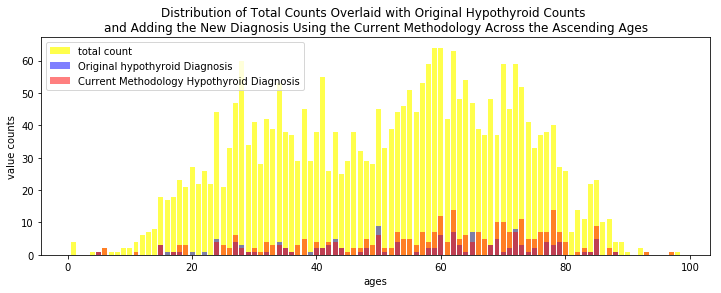

In [22]:
#Change figure size to make numbers on axes readable
plt.rcParams["figure.figsize"] = [12, 4]

plt.bar(x=np.unique(ht['age'].loc[(ht['age']!=0)]),
        height=ht['age'].loc[(ht['age']!=0)].value_counts(sort=False),
        color='yellow', alpha=.7, label='total count')
plt.bar(x=np.unique(ht['age'].loc[(ht['age']!=0)
                    &ht['hypothyroid'].isin(['hypothyroid'])]),
        height=ht['age'].loc[(ht['age']!=0)
                    &ht['hypothyroid'].isin(['hypothyroid'])].value_counts(sort=False), 
        color='blue',alpha=.5, label='Original hypothyroid Diagnosis')
plt.bar(x=np.unique(ht['age'].loc[(ht['age']!=0)
                    &ht['New_Hypothyroid'].isin(['t'])]),
        height=ht['age'].loc[(ht['age']!=0)
                    &ht['New_Hypothyroid'].isin(['t'])].value_counts(sort=False), 
        color='red',alpha=.5, label='Current Methodology Hypothyroid Diagnosis')

plt.legend(loc='upper left')
plt.xlabel('ages')
plt.ylabel('value counts')
plt.title('Distribution of Total Counts Overlaid with Original Hypothyroid Counts \
\nand Adding the New Diagnosis Using the Current Methodology \
Across the Ascending Ages')

plt.show()

The number of occurences of Hypothyroid has definitely increased and is no longer sprinkled throughout the histogram but rather forms a very solid curve with a right-skew favoring diagnosis in the older populations.

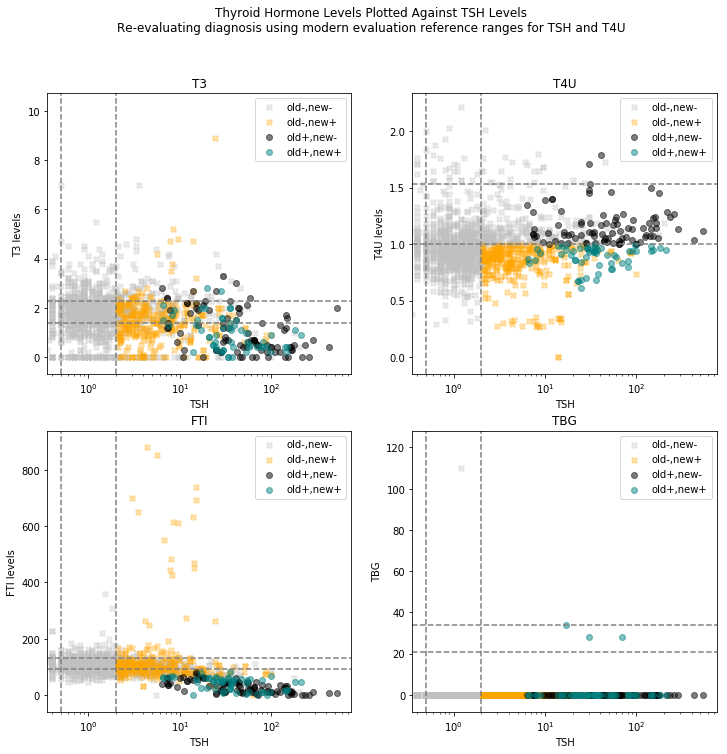

In [23]:
#Change figure size
plt.rcParams["figure.figsize"] = [12, 8]

x, axarr = plt.subplots(2, 2)

label1 = 'old-,new-'
label2 = 'old-,new+'
label3 = 'old+,new-'
label4 = 'old+,new+'

lbl1_color = 'silver'
lbl2_color = 'orange'
lbl3_color = 'black'
lbl4_color = 'teal'

axarr[0,0].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['negative']))
                                 &(ht['New_Hypothyroid'].isin(['f']))],
                   ht['T3'].loc[(ht['hypothyroid'].isin(['negative']))
                                 &(ht['New_Hypothyroid'].isin(['f']))],
                   c=lbl1_color, alpha=.3, label=label1, marker='X')
axarr[0,0].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['negative']))
                                 &(ht['New_Hypothyroid'].isin(['t']))],
                   ht['T3'].loc[(ht['hypothyroid'].isin(['negative']))
                                &(ht['New_Hypothyroid'].isin(['t']))],
                   c=lbl2_color, alpha=.3, label=label2, marker='X')
axarr[0,0].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['hypothyroid']))
                                 &(ht['New_Hypothyroid'].isin(['f']))],
                   ht['T3'].loc[(ht['hypothyroid'].isin(['hypothyroid']))
                                &(ht['New_Hypothyroid'].isin(['f']))],
                   c=lbl3_color, alpha=.5, label=label3)
axarr[0,0].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['hypothyroid']))
                                 &(ht['New_Hypothyroid'].isin(['t']))],
                   ht['T3'].loc[(ht['hypothyroid'].isin(['hypothyroid']))
                                &(ht['New_Hypothyroid'].isin(['t']))],
                   c=lbl4_color, alpha=.5, label=label4)
axarr[0,0].axhline(y=lowT3_2, color='gray', linestyle='--')
axarr[0,0].axhline(y=highT3_2, color='gray', linestyle='--')
axarr[0,0].axvline(x=lowTSH_new, color='gray', linestyle='--')
axarr[0,0].axvline(x=highTSH_new, color='gray', linestyle='--')
axarr[0,0].set_xscale('log')
axarr[0,0].set_xlabel('TSH')
axarr[0,0].set_ylabel('T3 levels')
axarr[0,0].legend(loc='upper right',prop={'size': 10});
axarr[0,0].set_title('T3')

axarr[0,1].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['New_Hypothyroid'].isin(['f']))],
                   ht['T4U'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['New_Hypothyroid'].isin(['f']))],
                   c=lbl1_color, alpha=.3, label=label1, marker='X')
axarr[0,1].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['New_Hypothyroid'].isin(['t']))],
                   ht['T4U'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['New_Hypothyroid'].isin(['t']))],
                   c=lbl2_color, alpha=.3, label=label2, marker='X')
axarr[0,1].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['New_Hypothyroid'].isin(['f']))],
                   ht['T4U'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['New_Hypothyroid'].isin(['f']))],
                   c=lbl3_color, alpha=.5, label=label3)
axarr[0,1].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['New_Hypothyroid'].isin(['t']))],
                   ht['T4U'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['New_Hypothyroid'].isin(['t']))],
                   c=lbl4_color, alpha=.5, label=label4)
axarr[0,1].axhline(y=lowT4U_new, color='gray', linestyle='--')
axarr[0,1].axhline(y=highT4U_new, color='gray', linestyle='--')
axarr[0,1].axvline(x=lowTSH_new, color='gray', linestyle='--')
axarr[0,1].axvline(x=highTSH_new, color='gray', linestyle='--')
axarr[0,1].set_xscale('log')
axarr[0,1].set_xlabel('TSH')
axarr[0,1].set_ylabel('T4U levels')
axarr[0,1].legend(loc='upper right',prop={'size': 10});
axarr[0,1].set_title('T4U')

axarr[1,0].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['New_Hypothyroid'].isin(['f']))],
                   ht['FTI'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['New_Hypothyroid'].isin(['f']))],
                   c=lbl1_color, alpha=.3, label=label1, marker='X')
axarr[1,0].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['New_Hypothyroid'].isin(['t']))],
                   ht['FTI'].loc[(ht['hypothyroid'].isin(['negative']))&
                                 (ht['New_Hypothyroid'].isin(['t']))],
                   c=lbl2_color, alpha=.3, label=label2, marker='X')
axarr[1,0].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['New_Hypothyroid'].isin(['f']))],
                   ht['FTI'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['New_Hypothyroid'].isin(['f']))],
                   c=lbl3_color, alpha=.5, label=label3)
axarr[1,0].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['New_Hypothyroid'].isin(['t']))],
                   ht['FTI'].loc[(ht['hypothyroid'].isin(['hypothyroid']))&
                                 (ht['New_Hypothyroid'].isin(['t']))],
                   c=lbl4_color, alpha=.5, label=label4)
axarr[1,0].axhline(y=lowFTI_2, color='gray', linestyle='--')
axarr[1,0].axhline(y=highFTI_2, color='gray', linestyle='--')
axarr[1,0].axvline(x=lowTSH_new, color='gray', linestyle='--')
axarr[1,0].axvline(x=highTSH_new, color='gray', linestyle='--')
axarr[1,0].set_xscale('log')
axarr[1,0].set_xlabel('TSH')
axarr[1,0].set_ylabel('FTI levels')
axarr[1,0].legend(loc='upper right',prop={'size': 10})
axarr[1,0].set_title('FTI')

axarr[1,1].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['negative']))
                                 &(ht['New_Hypothyroid'].isin(['f']))],
                   ht['TBG'].loc[(ht['hypothyroid'].isin(['negative']))
                                 &(ht['New_Hypothyroid'].isin(['f']))],
                   c=lbl1_color, alpha=.3, label=label1, marker='X')
axarr[1,1].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['negative']))
                                 &(ht['New_Hypothyroid'].isin(['t']))],
                   ht['TBG'].loc[(ht['hypothyroid'].isin(['negative']))
                                 &(ht['New_Hypothyroid'].isin(['t']))],
                   c=lbl2_color, alpha=.3, label=label2, marker='X')
axarr[1,1].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['hypothyroid']))
                                 &(ht['New_Hypothyroid'].isin(['f']))],
                   ht['TBG'].loc[(ht['hypothyroid'].isin(['hypothyroid']))
                                 &(ht['New_Hypothyroid'].isin(['f']))],
                   c=lbl3_color, alpha=.5, label=label3)
axarr[1,1].scatter(ht['TSH'].loc[(ht['hypothyroid'].isin(['hypothyroid']))
                                 &(ht['New_Hypothyroid'].isin(['t']))],
                   ht['TBG'].loc[(ht['hypothyroid'].isin(['hypothyroid']))
                                 &(ht['New_Hypothyroid'].isin(['t']))],
                   c=lbl4_color, alpha=.5, label=label4)
axarr[1,1].axhline(y=lowTBG_2, color='gray', linestyle='--')
axarr[1,1].axhline(y=highTBG_2, color='gray', linestyle='--')
axarr[1,1].axvline(x=lowTSH_new, color='gray', linestyle='--')
axarr[1,1].axvline(x=highTSH_new, color='gray', linestyle='--')
axarr[1,1].set_xscale('log')
axarr[1,1].set_xlabel('TSH')
axarr[1,1].set_ylabel('TBG')
axarr[1,1].legend(loc='upper right',prop={'size': 10});
axarr[1,1].set_title('TBG')

x.subplots_adjust(hspace=.2, top=1.2)
x.suptitle('Thyroid Hormone Levels Plotted Against TSH Levels\
\nRe-evaluating diagnosis using modern evaluation reference ranges for TSH and T4U'
           , y=1.35)

plt.show()

Lines drawn are either the newly selected reference ranges for TSH and T4U and all others are the caluclated quartile ranges.

In [24]:
#method for calculating errors for New_Thyroid bar graph
def ht_error_calc_NT(column1, column2, c2_condition):
    
    try:
        return (
            (ht[column1].loc[(ht[column1]!=0)
                 &(ht[column2].isin([c2_condition]))].std())
            /(ht[column1].loc[(ht[column1]!=0)
                 &(ht[column2].isin([c2_condition]))].count()**.5)
               )
    except ValueError:
        print('input error')

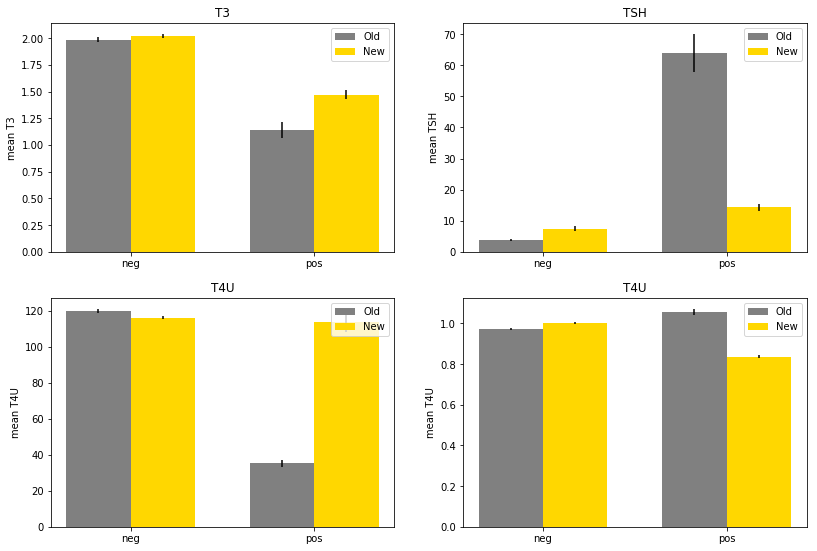

In [25]:
#Bar graphs comparing thyroid hormone levels in Hypothyroid diagnosed patients using old reference ranges vs new reference ranges
x, axarr = plt.subplots(2, 2)

ind = np.arange(2)
width = 0.35

fColor = 'gray'
mColor = 'gold'

tick_values = ('neg','pos')
legend_values = ('Old','New')

axarr[0,0].bar(ind, np.array([
    ht['T3'].loc[(ht['T3']!=0)
                 &(ht['hypothyroid'].isin(['negative']))
                ].mean(),
    ht['T3'].loc[(ht['T3']!=0)
                 &(ht['hypothyroid'].isin(['hypothyroid']))
                ].mean()
])
    , width, color=fColor, 
               yerr=(ht_error_calc_NT('T3', 'hypothyroid', 'negative'), 
                     ht_error_calc_NT('T3', 'hypothyroid', 'hypothyroid'))
              )
axarr[0,0].bar(ind+width, np.array([
    ht['T3'].loc[(ht['T3']!=0)
                 &(ht['New_Hypothyroid'].isin(['f']))
                ].mean(),
    ht['T3'].loc[(ht['T3']!=0)
                 &(ht['New_Hypothyroid'].isin(['t']))
                ].mean()
])
    , width, color=mColor, 
              yerr=(ht_error_calc_NT('T3', 'New_Hypothyroid', 'f'), 
                    ht_error_calc_NT('T3', 'New_Hypothyroid', 't'))
              )
axarr[0,0].set_title('T3')
axarr[0,0].set_ylabel('mean T3')
axarr[0,0].set_xticks(ind + width / 2)
axarr[0,0].set_xticklabels(tick_values)
axarr[0,0].legend(legend_values)

axarr[0,1].bar(ind, np.array([
    ht['TSH'].loc[(ht['TSH']!=0)
                  &(ht['hypothyroid'].isin(['negative']))
                 ].mean(),
    ht['TSH'].loc[(ht['TSH']!=0)
                  &(ht['hypothyroid'].isin(['hypothyroid']))
                 ].mean()
])
    , width, color=fColor, 
               yerr=(ht_error_calc_NT('TSH', 'hypothyroid', 'negative'), 
                     ht_error_calc_NT('TSH', 'hypothyroid', 'hypothyroid'))
              )
axarr[0,1].bar(ind+width, np.array([
    ht['TSH'].loc[(ht['TSH']!=0)
                  &(ht['New_Hypothyroid'].isin(['f']))
                 ].mean(),
    ht['TSH'].loc[(ht['TSH']!=0)
                  &(ht['New_Hypothyroid'].isin(['t']))
                 ].mean()
])
    , width, color=mColor, 
               yerr=(ht_error_calc_NT('TSH', 'New_Hypothyroid', 'f'), 
                     ht_error_calc_NT('TSH', 'New_Hypothyroid', 't'))
              )
axarr[0,1].set_title('TSH')
axarr[0,1].set_ylabel('mean TSH')
axarr[0,1].set_xticks(ind + width / 2)
axarr[0,1].set_xticklabels(tick_values)
axarr[0,1].legend(legend_values)

axarr[1,0].bar(ind,np.array([
    ht['FTI'].loc[(ht['FTI']!=0)
                  &(ht['hypothyroid'].isin(['negative']))
                 ].mean(),
    ht['FTI'].loc[(ht['FTI']!=0)
                  &(ht['hypothyroid'].isin(['hypothyroid']))
                 ].mean()
])
    , width, color=fColor, 
              yerr=(ht_error_calc_NT('FTI', 'hypothyroid', 'negative'), 
                    ht_error_calc_NT('FTI', 'hypothyroid', 'hypothyroid'))
              )
axarr[1,0].bar(ind + width,np.array([
    ht['FTI'].loc[(ht['FTI']!=0)
                  &(ht['New_Hypothyroid'].isin(['f']))
                 ].mean(),
    ht['FTI'].loc[(ht['FTI']!=0)
                  &(ht['New_Hypothyroid'].isin(['t']))
                 ].mean()
])
    , width, color=mColor, 
              yerr=(ht_error_calc_NT('FTI', 'New_Hypothyroid', 'f'), 
                    ht_error_calc_NT('FTI', 'New_Hypothyroid', 't'))
              )
axarr[1,0].set_title('T4U')
axarr[1,0].set_ylabel('mean T4U')
axarr[1,0].set_xticks(ind + width / 2)
axarr[1,0].set_xticklabels(tick_values)
axarr[1,0].legend(legend_values)

axarr[1,1].bar(ind, np.array([
    ht['T4U'].loc[(ht['T4U']!=0)
                  &(ht['hypothyroid'].isin(['negative']))
                 ].mean(),
    ht['T4U'].loc[(ht['T4U']!=0)
                  &(ht['hypothyroid'].isin(['hypothyroid']))
                 ].mean()
])
    , width, color=fColor, 
              yerr=(ht_error_calc_NT('T4U', 'hypothyroid', 'negative'), 
                    ht_error_calc_NT('T4U', 'hypothyroid', 'hypothyroid'))
                   )
axarr[1,1].bar(ind + width, np.array([
    ht['T4U'].loc[(ht['T4U']!=0)
                  &(ht['New_Hypothyroid'].isin(['f']))
                 ].mean(),
    ht['T4U'].loc[(ht['T4U']!=0)
                  &(ht['New_Hypothyroid'].isin(['t']))
                 ].mean()
])
    , width, color=mColor, 
              yerr=(ht_error_calc_NT('T4U', 'New_Hypothyroid', 'f'), 
                    ht_error_calc_NT('T4U', 'New_Hypothyroid', 't'))
                   )
axarr[1,1].set_ylabel('mean T4U')
axarr[1,1].set_title('T4U')
axarr[1,1].set_xticks(ind + width / 2)
axarr[1,1].set_xticklabels(tick_values)
axarr[1,1].legend(legend_values)

x.subplots_adjust(top=1, right=1)

plt.show()

Shifting the criteria for diagnosis hardly effects the average levels of thyroid hormones in negative patients but drastically changes the profile for hypothyroid positive patients.  This is expected in the two values we manipulated to shift the diagnosis, TSH and T4U, but it also significantly changed T3 and FTI.

# Gender and Hypothyroidism
In our preliminary overview we noticed a much larger group of women than men in nearly every age category. So it seems that women are being evaluated in greater numbers than men. Digging into some more onlone research one discovers a handful of articles discussin some of the differences between the genders in symptoms and physiological responses to thyroid hormone imbalances.

A quick online search for gender differences in hypothyroidism found this web page https://www.researchgate.net/publication/274459754_Gender_differences_in_symptoms_of_hypothyroidism_A_population-based_DanThyr_study which reports "The presence of symptoms is more indicative for overt autoimmune hypothyroidism in men than in women, and presumably persistent symptoms after therapy of hypothyroidism will be more common in women "

And just more examples of reports that hypothyroid is more prevalent in women than men.
https://sciencebasedmedicine.org/hypothyroidism-the-facts-the-controversies-and-the-pseudoscience/

And this paper that as we age there are biologically releveant differences to the way men and women respond to thyroid hormones.
https://thyroidresearchjournal.biomedcentral.com/articles/10.1186/1756-6614-5-1

Let's explore this in our current data set:

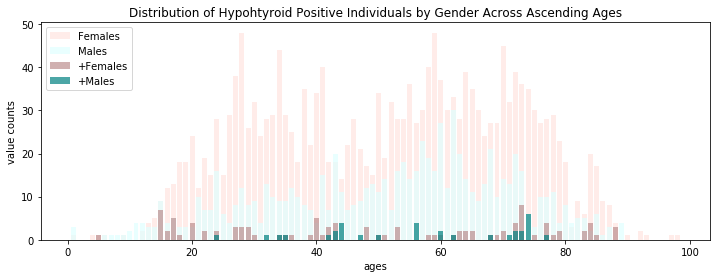

In [35]:
#Change figure size
plt.rcParams["figure.figsize"] = [12, 4]

plt.bar(x=np.unique(ht['age'].loc[(ht['age']!=0)
                                 &(ht['sex'].isin(['F']))]),
        height=ht['age'].loc[(ht['age']!=0)
                            &(ht['sex'].isin(['F']))].value_counts(sort=False),
        color='mistyrose', alpha=.7, label='Females')
plt.bar(x=np.unique(ht['age'].loc[(ht['age']!=0)
                    &ht['sex'].isin(['M'])]),
        height=ht['age'].loc[(ht['age']!=0)
                    &ht['sex'].isin(['M'])].value_counts(sort=False), 
        color='lightcyan',alpha=.7, label='Males')

plt.bar(x=np.unique(ht['age'].loc[(ht['age']!=0)
                                 &(ht['sex'].isin(['F']))
                                 &(ht['hypothyroid'].isin(['hypothyroid']))]),
        height=ht['age'].loc[(ht['age']!=0)
                             &(ht['sex'].isin(['F']))
                             &(ht['hypothyroid'].isin(['hypothyroid']))
                            ].value_counts(sort=False),
        color='rosybrown', alpha=.7, label='+Females')
plt.bar(x=np.unique(ht['age'].loc[(ht['age']!=0)
                                  &(ht['sex'].isin(['M']))
                                  &(ht['hypothyroid'].isin(['hypothyroid']))]),
        height=ht['age'].loc[(ht['age']!=0)
                             &(ht['sex'].isin(['M']))
                             &(ht['hypothyroid'].isin(['hypothyroid']))
                            ].value_counts(sort=False), 
        color='teal',alpha=.7, label='+Males')

plt.legend(loc='upper left')
plt.xlabel('ages')
plt.ylabel('value counts')
plt.title('Distribution of Hypohtyroid Positive Individuals by Gender Across Ascending Ages')

plt.show()

In [36]:
#method for calculating errors for bar graph
def ht_error_calc_MF(column, ht_condition, sex):
    
    try:
        return (ht[column].loc[(ht[column]!=0)
                 &(ht['hypothyroid'].isin([ht_condition]))
                 &(ht['sex'].isin([sex]))
                ].std())/((ht[column].loc[(ht[column]!=0)
                 &(ht['hypothyroid'].isin([ht_condition]))
                 &(ht['sex'].isin([sex]))
                ].count())**.5)
    except ValueError:
        print('input error')

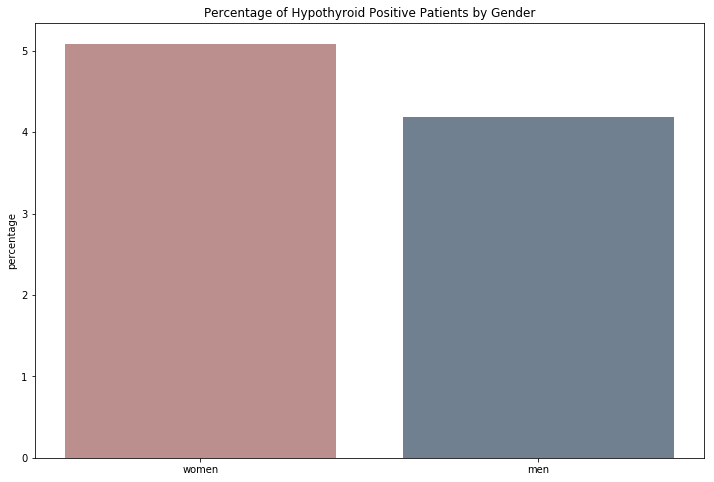

In [76]:
#Change figure size
plt.rcParams["figure.figsize"] = [12, 8]

ind = np.arange(2)

fColor = 'rosybrown'
mColor = 'slategrey'

plt.bar(ind, np.array([
    ht['sex'].loc[(ht['sex'].isin(['F']))
                  &(ht['hypothyroid'].isin(['hypothyroid']))].count()
    /ht['sex'].loc[ht['sex'].isin(['F'])].count()
    *100
    ,
    ht['sex'].loc[ht['sex'].isin(['M'])
                  &ht['hypothyroid'].isin(['hypothyroid'])].count()
    /ht['sex'].loc[ht['sex'].isin(['M'])].count()
   *100
])
    , color=[fColor,mColor], label='Males')

plt.ylabel('percentage')
plt.xticks(ind, ['women','men'])
plt.title('Percentage of Hypothyroid Positive Patients by Gender')

plt.show()

Though there are far fewer men being diagnosed as hypothyroid there are also far fewer men being evaluated for thyroid condition.  This results in just over 4 percent diagnosis rate for males compared to a 5 percent rate for females.

# Summary of information

Overall this dataset is sufficient for what it was intended - a practice or training set for a Machine Learning exercise - but for digging into and procuring any meaningful conclusions about hypothyroidism it is insufficient in the information supplied.  Hypothyroidism is a complex disease that is slow to manifest symptoms and is still poorly understood. Thyroid hormone levels tell part of the story and help in diagnosis, but they are not definitive in their diagnostic power and there is much debate today about their authoritative nature in diagnosing the disease.  To make this dataset a more powerful tool in predicting diagnosis based on hormone levels categories, such as describing reported symptoms, need to be included.  After this initial foray into delving deeper into the clincial diagnosis of thyroid disease it is clear that evaluation and diagnosis is not always clear cut. 

As I am personally affected by Hashimoto's Thyroiditis and have gone through my own little mis-adventure of personal physicians and endocrinologists relying heavily, and sometimes solely, on these types of measurements to proclaim me healed despite still experiencing profound symptoms, I am very interested in further research.  To start I am interested to know exactly how these refernce ranges are developed.  I know that most of the time hormone levels are not part of routine blood work in general health exams.  As was the case with me - most people first complain of symptoms before a doctor might suspect thyroid issues.  Often symptoms are attributed to other disorders, especially mood and mental issues such as depression or anxiety.

The paper regarding physiological different responses between men and women as they age piqued my interest as well.  It seems to me that this study used the same criteria for diagnosing both men and women.  But estrogen greatly affects how thyroid hormones are processed by the body so it makes sense that men and women respond differently to thyroid hormones and perhaps we need seperate criteria for diagnosing thyroid disease in men and women.